In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pathlib import Path

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
def adf_test(series, title=''):
    """Проверка стационарности с помощью теста Дики-Фуллера"""
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'ADF Statistic for {title}: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}, {value}')
    print("Stationary" if result[1] <= 0.05 else "Non-stationary")
    print()

In [4]:
def make_stationary(df, col='Count', title='', seasonal_diff=False):
    """Стационаризация ряда"""
    series = df[col]

    print(f"=== Before differencing: {title} ===")
    adf_test(series, title)

    # Дифференцирование (первое, сезонное при необходимости)
    df['diff'] = series.diff()
    if seasonal_diff:
        df['diff'] = df['diff'].diff(12)

    print(f"=== After differencing: {title} ===")
    adf_test(df['diff'], f"{title} - differenced")

    # Построение графиков
    fig, axs = plt.subplots(3, 1, figsize=(12, 10))
    axs[0].plot(series, label='Original')
    axs[0].set_title(f"{title} - Original")
    axs[1].plot(df['diff'], label='Differenced', color='orange')
    axs[1].set_title(f"{title} - Differenced")
    plot_acf(df['diff'].dropna(), ax=axs[2])
    axs[2].set_title(f"{title} - ACF after differencing")
    plt.tight_layout()
    plt.show()

    return df

In [5]:
births = pd.read_csv("data/daily-total-female-births-in-cal.csv", parse_dates=['Date'], index_col='Date')
passengers = pd.read_csv("data/international-airline-passengers.csv", skiprows=1, names=['Month', 'Passengers'], parse_dates=['Month'], index_col='Month')
temperature = pd.read_csv("data/mean-monthly-air-temperature-deg.csv", parse_dates=['Month'], index_col='Month')
dow_index = pd.read_csv("data/weekly-closings-of-the-dowjones-.csv", parse_dates=['Week'], index_col='Week')
df_robbery = pd.read_csv("data/monthly-boston-armed-robberies-j.csv", parse_dates=['Month'], index_col='Month')
df_sales = pd.read_csv("data/monthly-sales-of-company-x-jan-6.csv", parse_dates=['Month'], index_col='Month')

/tmp/ipykernel_8616/1242055677.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dow_index = pd.read_csv("data/weekly-closings-of-the-dowjones-.csv", parse_dates=['Week'], index_col='Week')


In [6]:
time_series = [
    (df_sales, 'Продажи компании'),
    (df_robbery, 'Ограбления в Бостоне'),
    (dow_index, 'Dow Jones'),
    (births.rename(columns={'Count': 'Count'}), 'Рождения в Калифорнии'),
    (passengers.rename(columns={'Passengers': 'Count'}), 'Международные авиапассажиры'),
    (temperature.rename(columns={temperature.columns[0]: 'Count'}), 'Температура воздуха'),
]

=== Before differencing: Продажи компании ===
ADF Statistic for Продажи компании: 0.654715082952446
p-value: 0.9888894205170052
Critical Values:
   1%, -3.53692771987915
   5%, -2.907887369384766
   10%, -2.591493291015625
Non-stationary

=== After differencing: Продажи компании ===
ADF Statistic for Продажи компании - differenced: -2.5879697670629405
p-value: 0.09550925078559036
Critical Values:
   1%, -3.5386953618719676
   5%, -2.9086446751210775
   10%, -2.591896782564878
Non-stationary



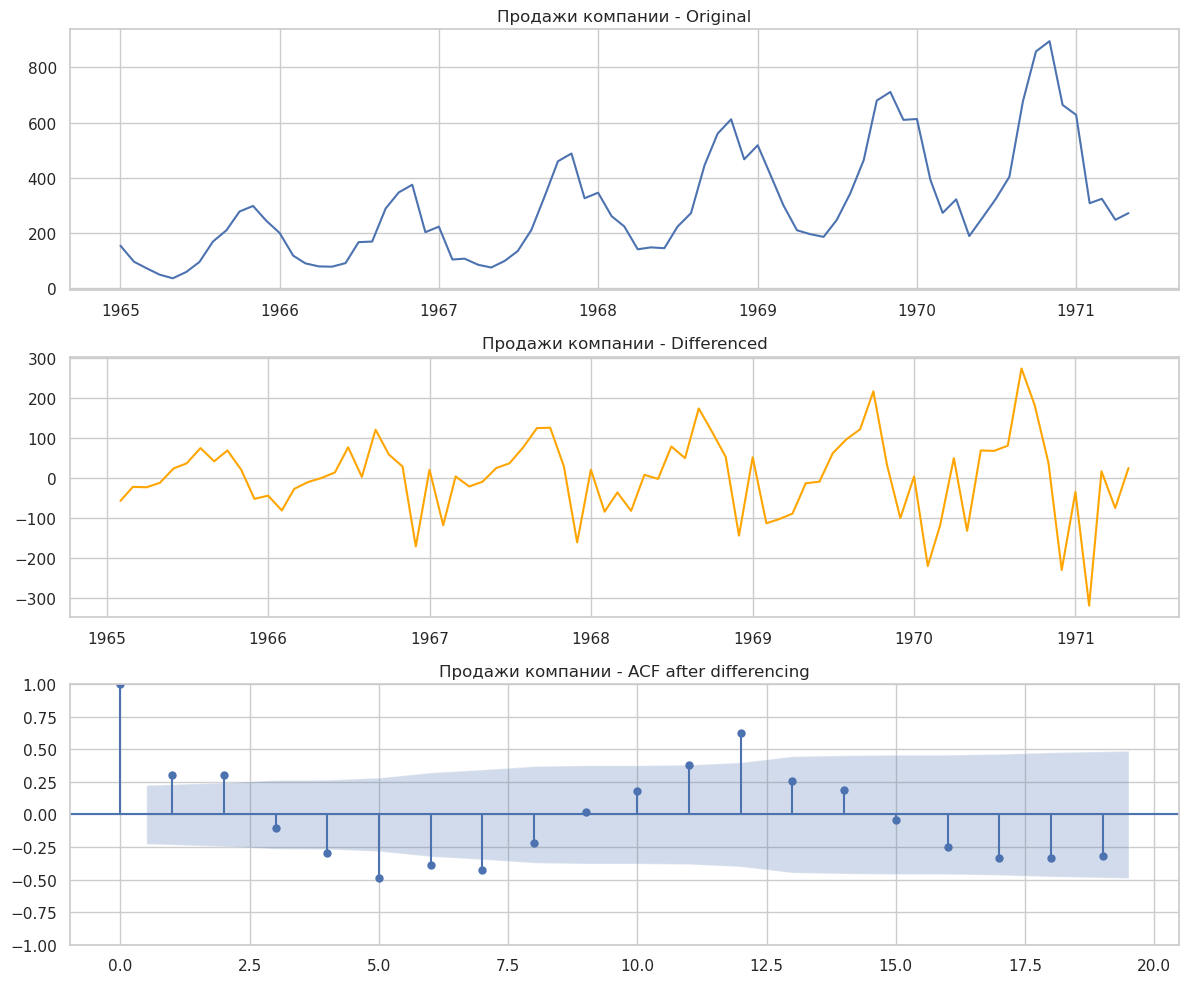

=== Before differencing: Ограбления в Бостоне ===
ADF Statistic for Ограбления в Бостоне: 1.0011021402458138
p-value: 0.9942775638057234
Critical Values:
   1%, -3.4936021509366793
   5%, -2.8892174239808703
   10%, -2.58153320754717
Non-stationary

=== After differencing: Ограбления в Бостоне ===
ADF Statistic for Ограбления в Бостоне - differenced: -7.428564475067203
p-value: 6.450795412686915e-11
Critical Values:
   1%, -3.4936021509366793
   5%, -2.8892174239808703
   10%, -2.58153320754717
Stationary



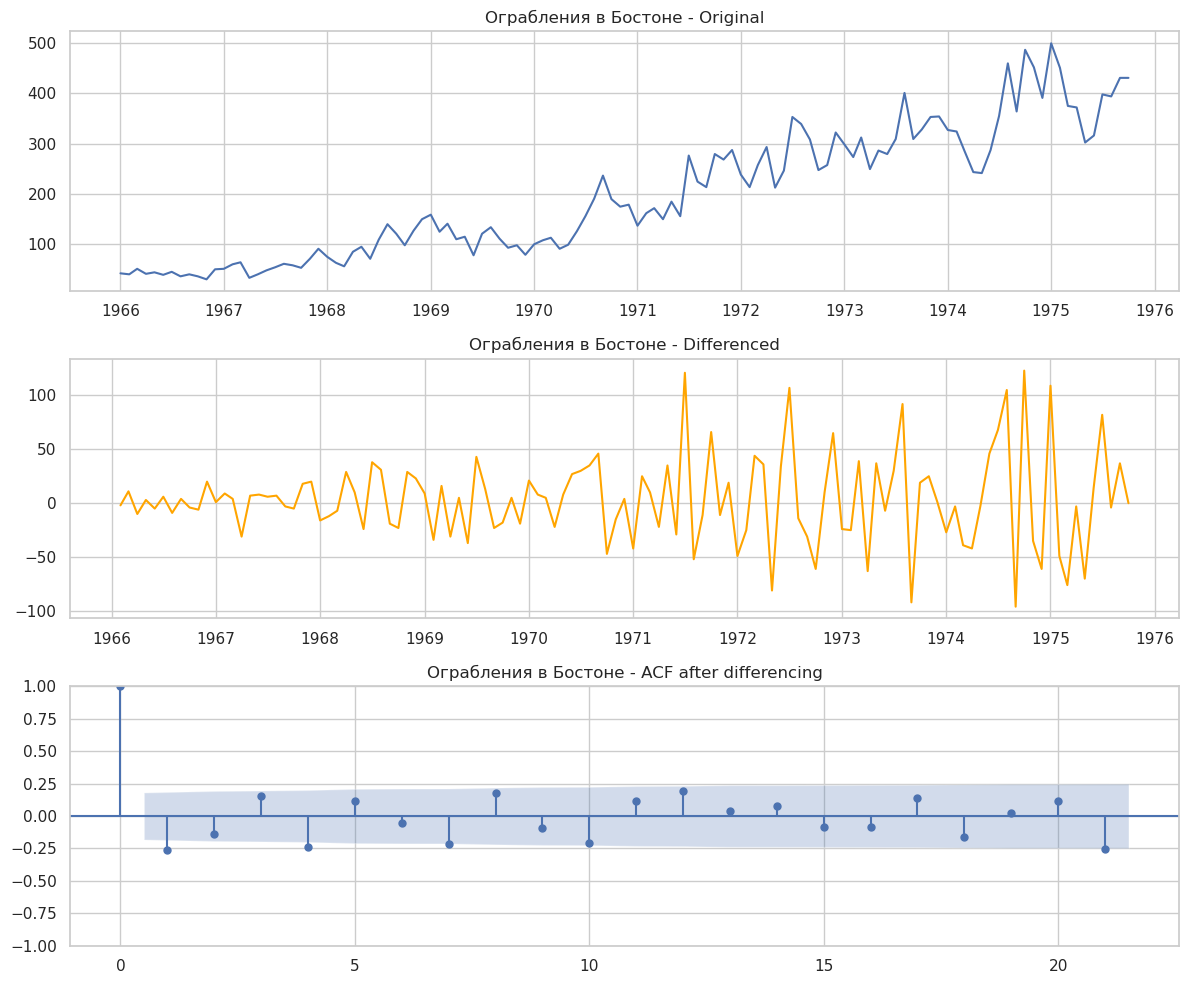

=== Before differencing: Dow Jones ===
ADF Statistic for Dow Jones: -1.314625498491172
p-value: 0.6224548515589716
Critical Values:
   1%, -3.471633386932248
   5%, -2.8796651107461972
   10%, -2.576433647235832
Non-stationary

=== After differencing: Dow Jones ===
ADF Statistic for Dow Jones - differenced: -13.02520788123495
p-value: 2.4075864037417096e-24
Critical Values:
   1%, -3.4718957209472654
   5%, -2.8797795410156253
   10%, -2.5764947265625
Stationary



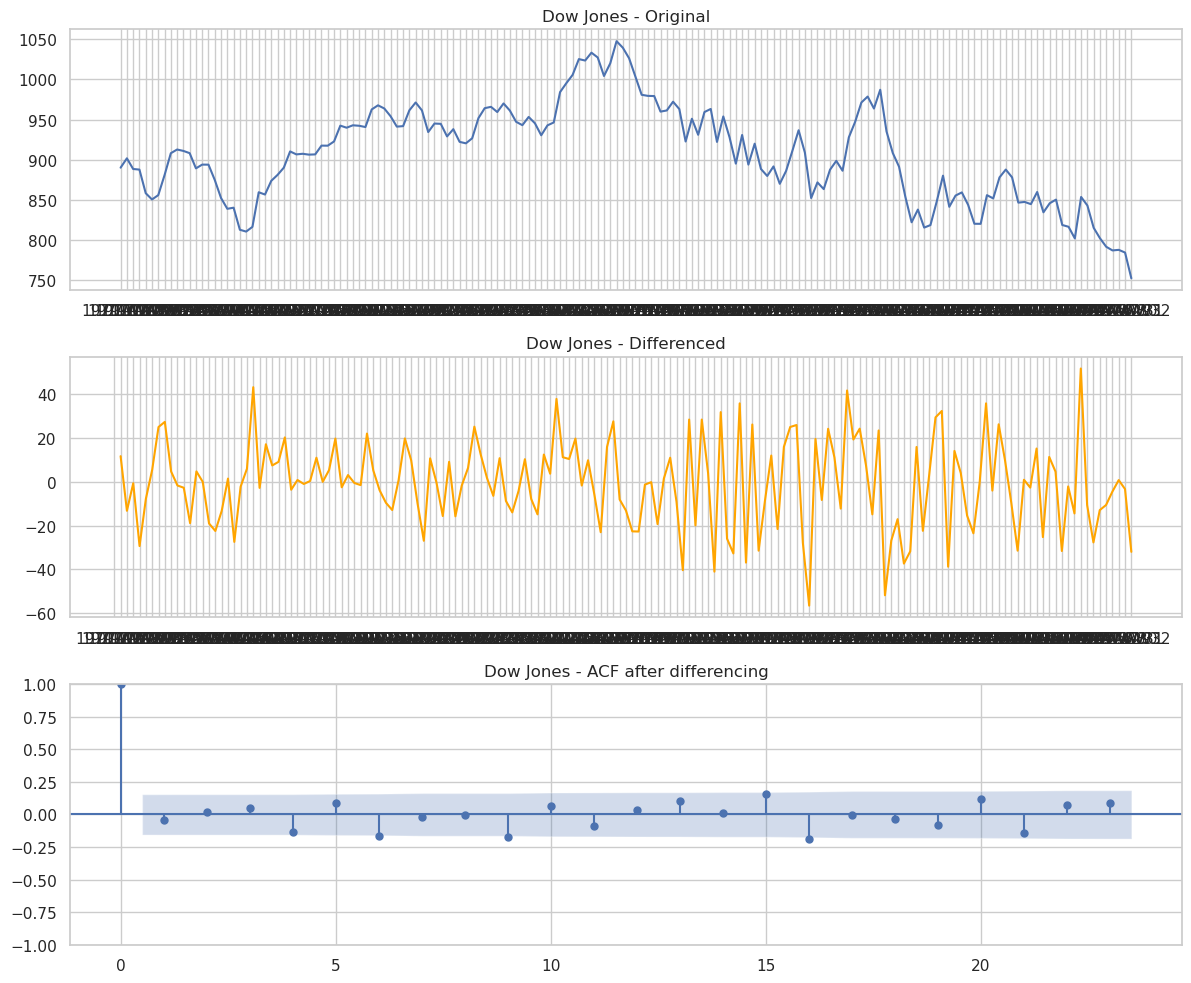

=== Before differencing: Рождения в Калифорнии ===
ADF Statistic for Рождения в Калифорнии: -4.808291253559765
p-value: 5.2434129901498554e-05
Critical Values:
   1%, -3.448748905151901
   5%, -2.8696473721448728
   10%, -2.5710891239349585
Stationary

=== After differencing: Рождения в Калифорнии ===
ADF Statistic for Рождения в Калифорнии - differenced: -12.625178633871363
p-value: 1.5472400091968453e-23
Critical Values:
   1%, -3.44880082033912
   5%, -2.869670179576637
   10%, -2.5711012838861036
Stationary



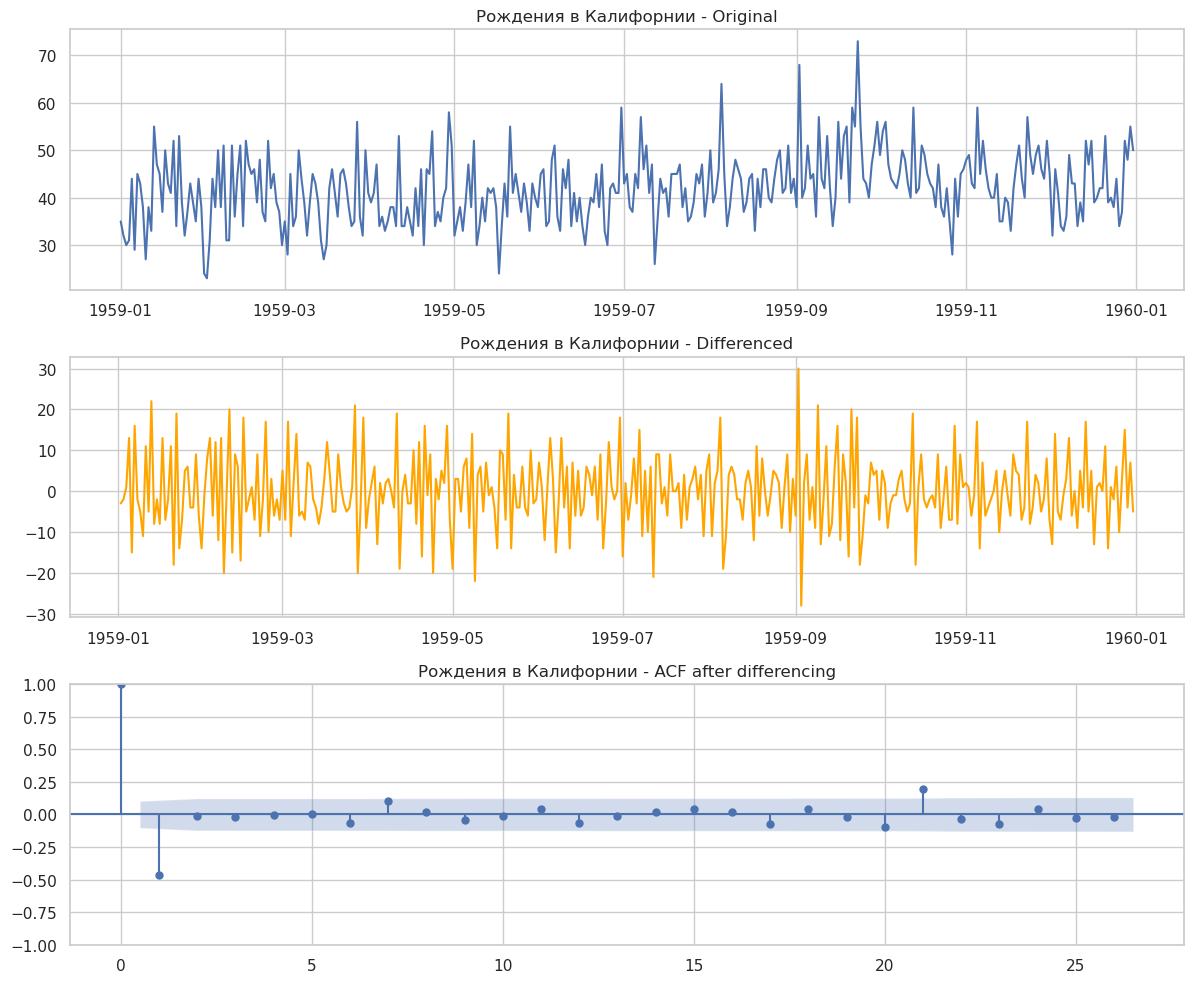

=== Before differencing: Международные авиапассажиры ===
ADF Statistic for Международные авиапассажиры: 0.8153688792060511
p-value: 0.991880243437641
Critical Values:
   1%, -3.4816817173418295
   5%, -2.8840418343195267
   10%, -2.578770059171598
Non-stationary

=== After differencing: Международные авиапассажиры ===
ADF Statistic for Международные авиапассажиры - differenced: -15.595618083746338
p-value: 1.856511600123444e-28
Critical Values:
   1%, -3.4816817173418295
   5%, -2.8840418343195267
   10%, -2.578770059171598
Stationary



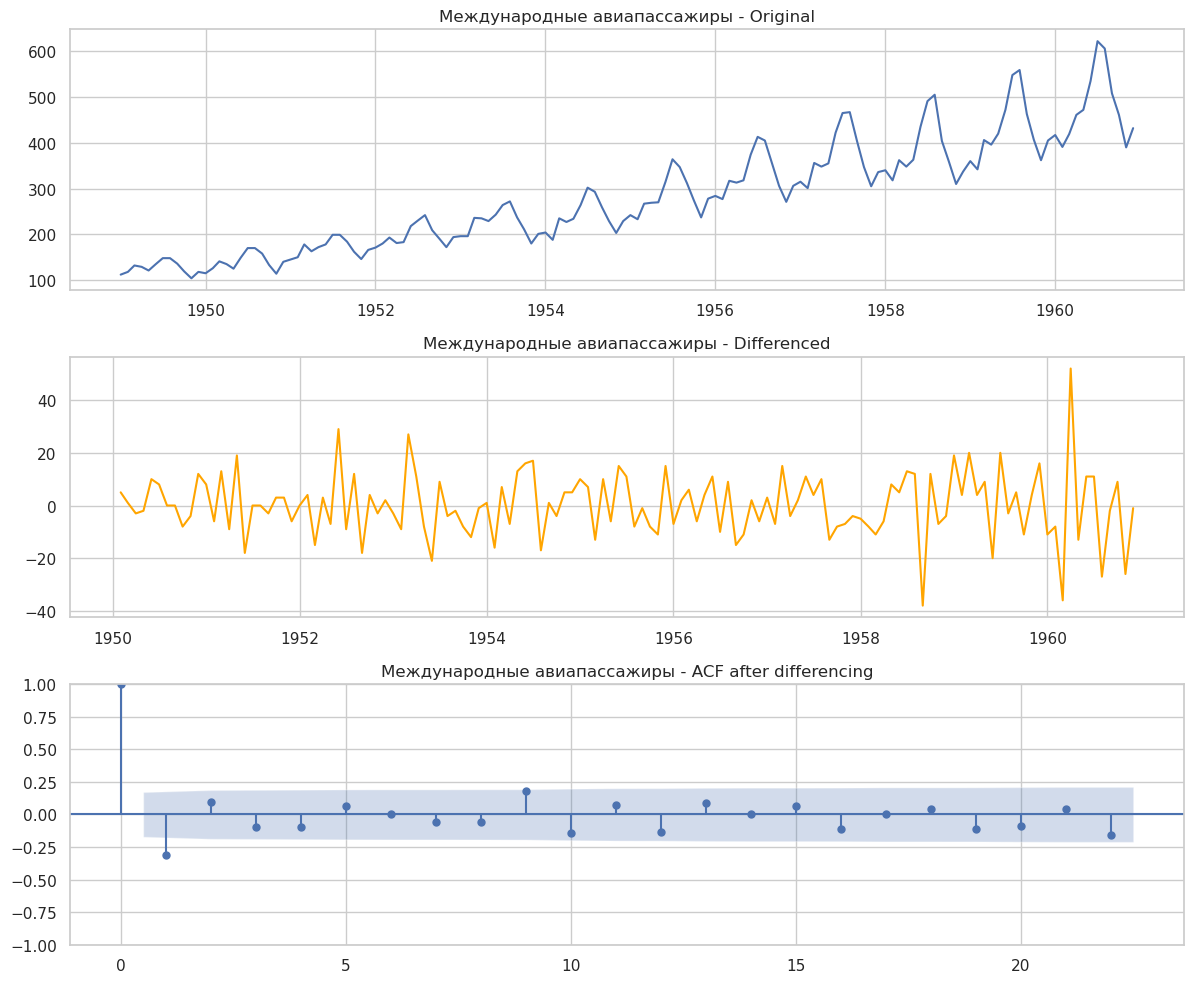

=== Before differencing: Температура воздуха ===
ADF Statistic for Температура воздуха: -3.2554924030863277
p-value: 0.01698903022260905
Critical Values:
   1%, -3.4597521044060353
   5%, -2.874472927517147
   10%, -2.5736628197530864
Stationary

=== After differencing: Температура воздуха ===
ADF Statistic for Температура воздуха - differenced: -7.86224095305669
p-value: 5.2465999005986686e-12
Critical Values:
   1%, -3.46172743446274
   5%, -2.8753374677799957
   10%, -2.574124089081557
Stationary



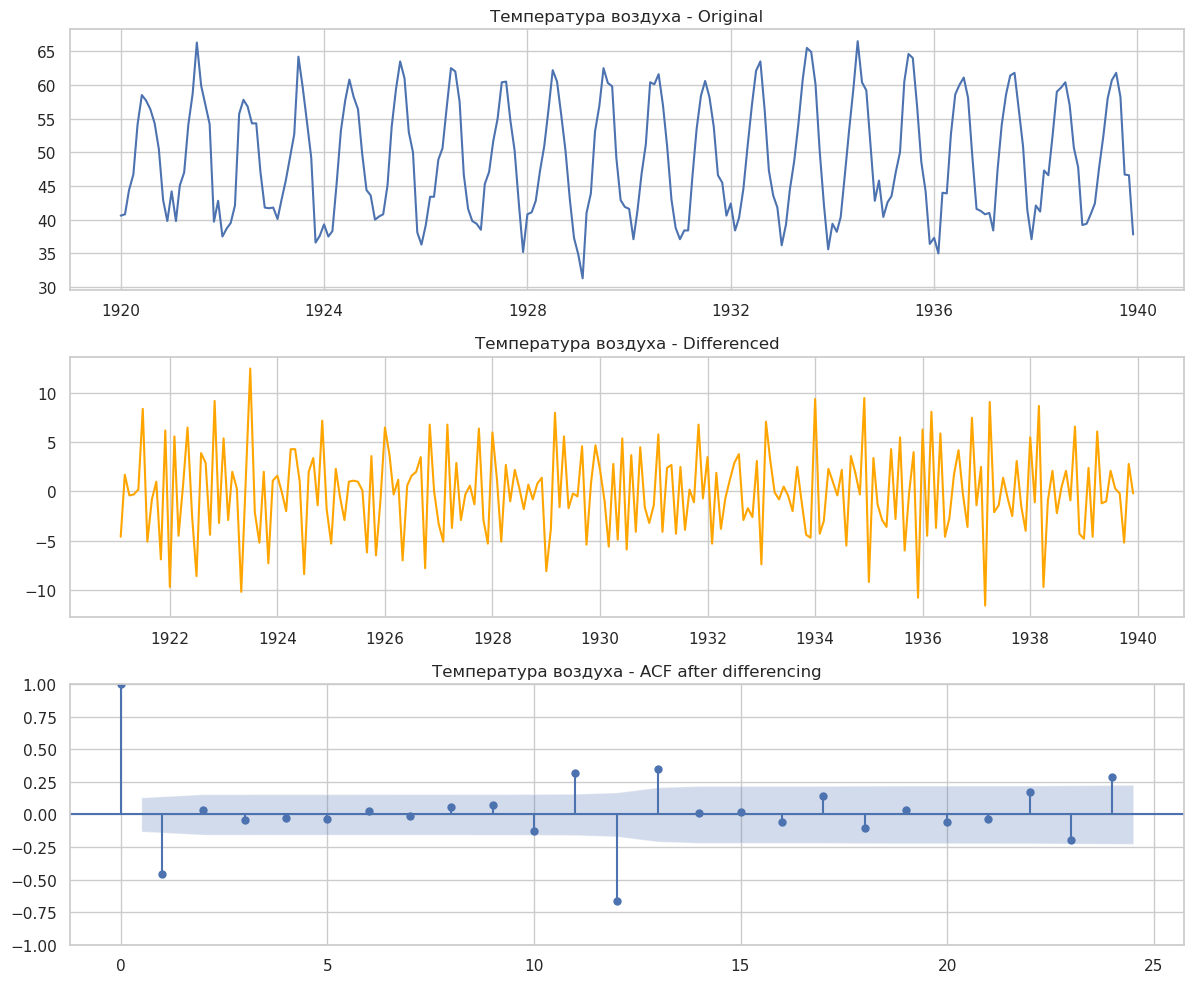

In [7]:
results = []
for df, title in time_series:
    seasonal = title in ['Международные авиапассажиры', 'Температура воздуха']
    result = make_stationary(df.copy(), col='Count' if 'Count' in df.columns else 'Close', title=title, seasonal_diff=seasonal)
    results.append((title, result))